# 라이브러리 및 데이터 불러오기

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("./data/cookie_cats.csv")

In [16]:
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


# Gate_30, Gate_40 비율

Text(0.5, 1.0, '< Gate_30, Gate_40 비율 >')

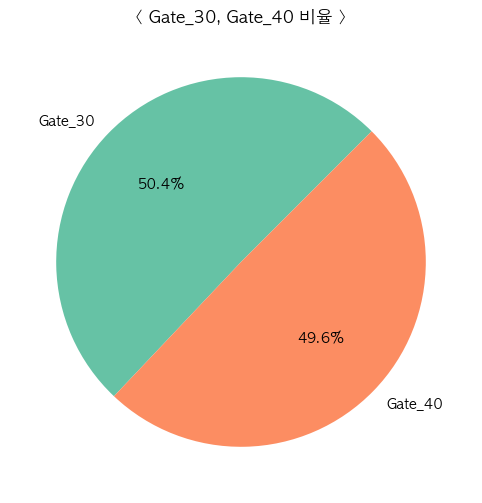

In [17]:
# sns.countplot(data = df, x = df["version"], palette = "hls")
a = len(df) - len(df[df["version"] == "gate_30"])
b = len(df) - len(df[df["version"] == "gate_40"])

x = [a, b]
y = ["Gate_30", "Gate_40"]

plt.figure(figsize = (12, 6))
plt.pie(x,
       labels = y,
       autopct='%.1f%%',
        startangle = 45,
       colors = plt.cm.Set2.colors)
plt.title("< Gate_30, Gate_40 비율 >")

# 총 게임라운드 Boxplot 확인

<Axes: >

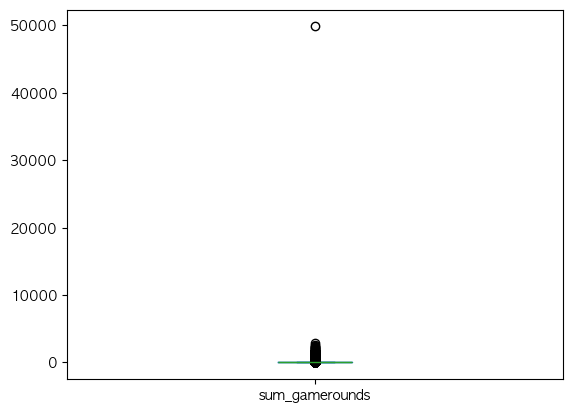

In [18]:
df["sum_gamerounds"].plot(kind = "box")

In [19]:
df.sort_values(by = "sum_gamerounds", ascending = False)

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True
7912,871500,gate_30,2961,True,True
29417,3271615,gate_40,2640,True,False
43671,4832608,gate_30,2438,True,True
48188,5346171,gate_40,2294,True,True
...,...,...,...,...,...
59687,6610805,gate_30,0,False,False
23707,2639282,gate_40,0,False,False
59670,6608718,gate_30,0,False,False
59645,6604544,gate_30,0,False,False


In [20]:
df = df.drop(df[(df["version"] == "gate_40") & (df["sum_gamerounds"] < 40)].index)

In [21]:
df = df.drop(df[(df["version"] == "gate_30") & (df["sum_gamerounds"] < 30)].index)

In [22]:
df = df.drop(df[df["sum_gamerounds"] == 49854].index)

In [23]:
df.sort_values(by = "sum_gamerounds", ascending = False)

,userid,version,sum_gamerounds,retention_1,retention_7
7912,871500,gate_30,2961,True,True
29417,3271615,gate_40,2640,True,False
43671,4832608,gate_30,2438,True,True
48188,5346171,gate_40,2294,True,True
46344,5133952,gate_30,2251,True,True
...,...,...,...,...,...
80339,8893414,gate_30,30,True,False
35895,3975387,gate_30,30,True,False
74221,8224200,gate_30,30,True,True
3242,359399,gate_30,30,True,False


<Axes: >

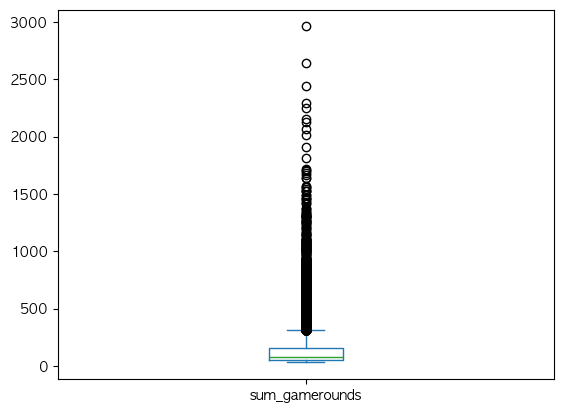

In [24]:
df["sum_gamerounds"].plot(kind = "box")

In [25]:
max(df["sum_gamerounds"])

2961

# sum_gamerounds 그룹별로 묶어서 탐색

In [28]:
tmp = []

for r in df["sum_gamerounds"]:
    if r >= 30 and r < 200:
        tmp.append("A")
    elif r >= 200 and r < 400:
        tmp.append("B")
    elif r >= 400 and r < 600:
        tmp.append("C")
    elif r >= 600 and r < 800:
        tmp.append("D")
    elif r >= 800 and r < 1000:
        tmp.append("E")
    elif r >= 1000 and r < 1200:
        tmp.append("F")
    elif r >= 1200 and r < 1400:
        tmp.append("G")
    elif r >= 1400 and r < 1600:
        tmp.append("H")
    elif r >= 1600 and r < 1800:
        tmp.append("I")
    elif r >= 1800 and r < 2000:
        tmp.append("J")
    elif r >= 2000 and r < 2200:
        tmp.append("K")
    elif r >= 2200 and r < 2400:
        tmp.append("L")
    elif r >= 2400 and r < 2600:
        tmp.append("M")
    elif r >= 2600 and r < 2800:
        tmp.append("N")
    elif r >= 2800 and r < 3000:
        tmp.append("O")

In [29]:
df["gameround_group"] = tmp

/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_11184/3087051439.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,


<Axes: xlabel='gameround_group', ylabel='count'>

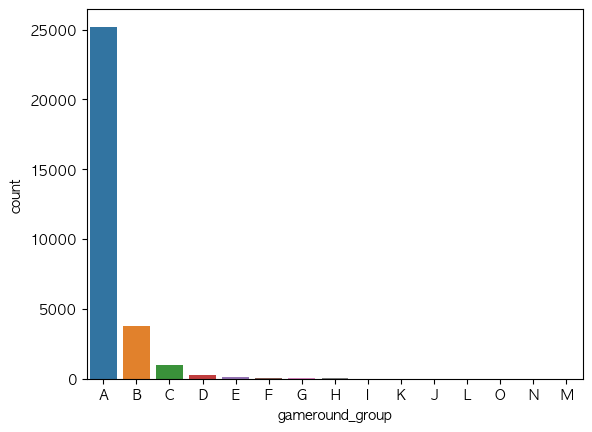

In [30]:
sns.countplot(data = df,
              x = "gameround_group",
              order = df["gameround_group"].value_counts().index,
              palette = "tab10")

# retention_1 / retention_7 비율 확인

/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_2160/4221669068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "retention_1", palette = "tab10")
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_2160/4221669068.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "retention_7", palette = "tab10")


Text(0.5, 1.0, '< 총 유저의 retention_7 비율 >')

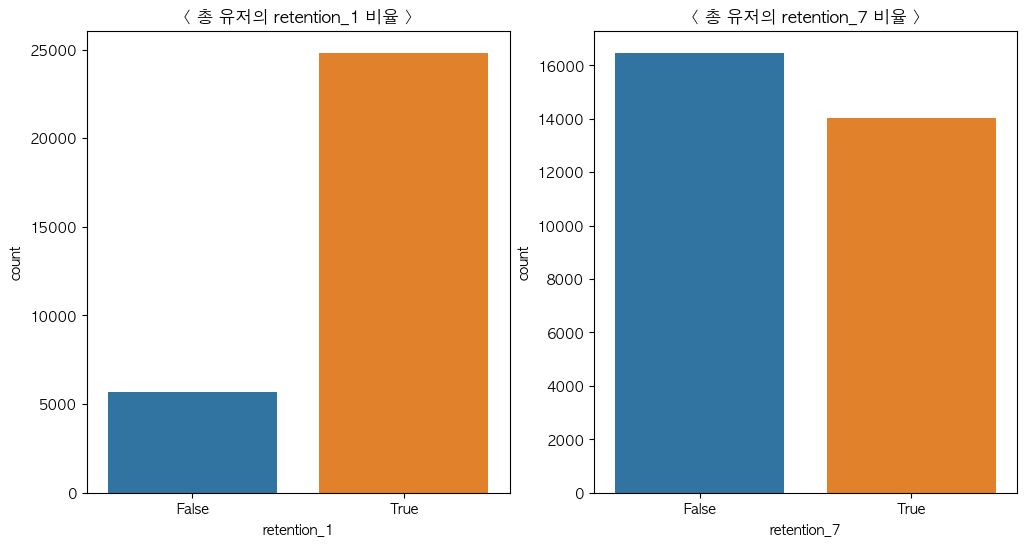

In [46]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data = df, x = "retention_1", palette = "tab10")
plt.title("< 총 유저의 retention_1 비율 >")

plt.subplot(1, 2, 2)
sns.countplot(data = df, x = "retention_7", palette = "tab10")
plt.title("< 총 유저의 retention_7 비율 >")

# gate_30 유저의 retention_1, retention_7 비율 확인

In [47]:
gate_30_df = df[df["version"] == "gate_30"]

In [48]:
gate_30_df

,userid,version,sum_gamerounds,retention_1,retention_7
1,337,gate_30,38,True,False
13,2179,gate_30,39,True,False
14,2218,gate_30,305,True,True
15,2382,gate_30,73,True,False
17,2451,gate_30,204,True,True
...,...,...,...,...,...
90163,9996688,gate_30,83,True,True
90164,9996750,gate_30,48,True,False
90165,9996935,gate_30,35,False,True
90171,9997757,gate_30,84,True,False


/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_2160/1313725912.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = gate_30_df, x = "retention_1", palette = "tab10")
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_2160/1313725912.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = gate_30_df, x = "retention_7", palette = "tab10")


Text(0.5, 1.0, '< gate_30 유저의 retention_7 비율 >')

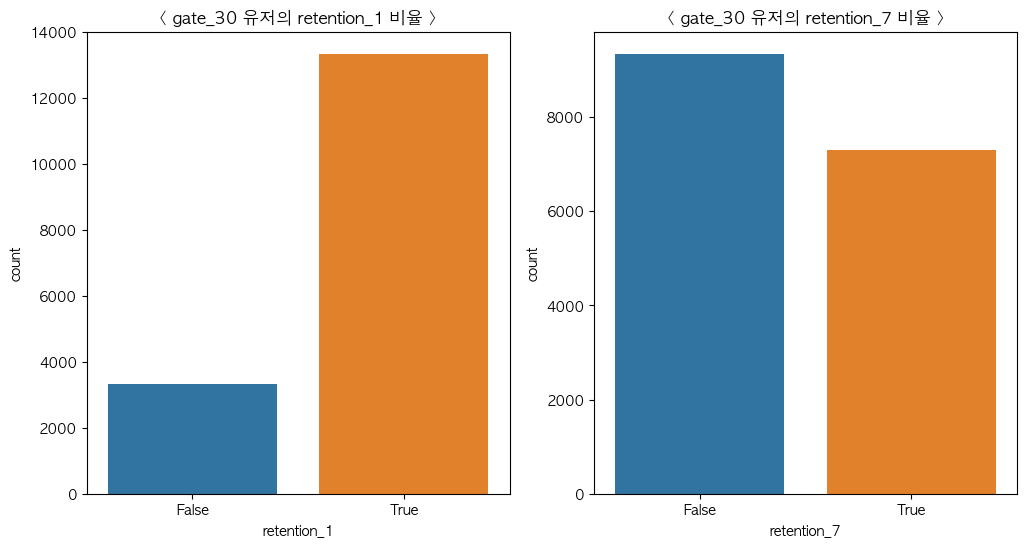

In [49]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data = gate_30_df, x = "retention_1", palette = "tab10")
plt.title("< gate_30 유저의 retention_1 비율 >")

plt.subplot(1, 2, 2)
sns.countplot(data = gate_30_df, x = "retention_7", palette = "tab10")
plt.title("< gate_30 유저의 retention_7 비율 >")

# gate_40 유저의 retention_1, retention_7 비율 확인

In [50]:
gate_40_df = df[df["version"] == "gate_40"]

In [51]:
gate_40_df

,userid,version,sum_gamerounds,retention_1,retention_7
2,377,gate_40,165,True,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False
...,...,...,...,...,...
90159,9996209,gate_40,40,True,False
90167,9997037,gate_40,44,False,False
90177,9998376,gate_40,53,False,False
90184,9999441,gate_40,97,True,False


/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_2160/1003162724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = gate_40_df, x = "retention_1", palette = "tab10")
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_2160/1003162724.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = gate_40_df, x = "retention_7", palette = "tab10")


Text(0.5, 1.0, '< gate_40 유저의 retention_7 비율 >')

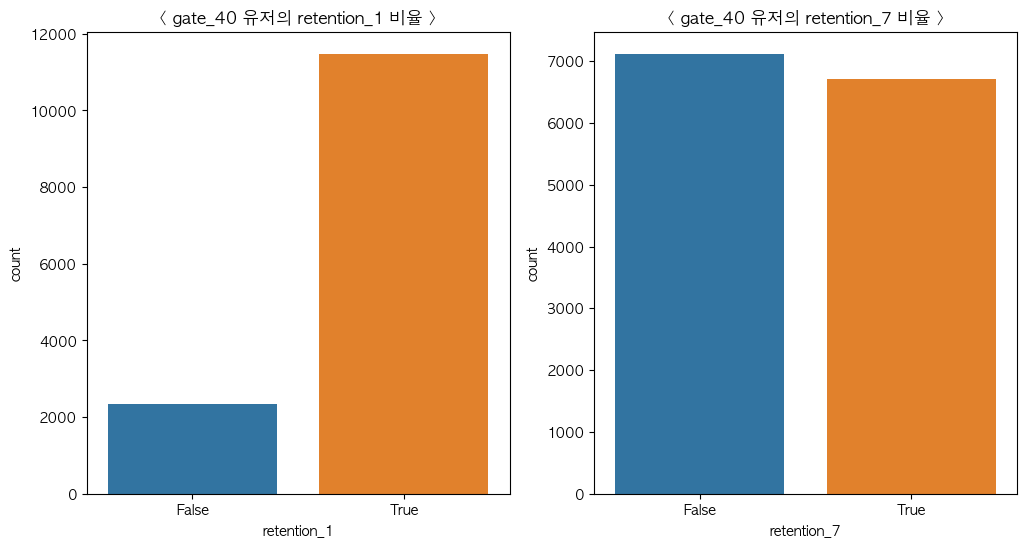

In [52]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data = gate_40_df, x = "retention_1", palette = "tab10")
plt.title("< gate_40 유저의 retention_1 비율 >")

plt.subplot(1, 2, 2)
sns.countplot(data = gate_40_df, x = "retention_7", palette = "tab10")
plt.title("< gate_40 유저의 retention_7 비율 >")

# 전처리한 데이터 내보내기

In [53]:
df.to_csv("./data/preprocessed_second_cookie_cat.csv")